# **Lab 7: Optimization and learning**
**Kristoffer Almroth**

# **Abstract**

Seventh lab in the course DD2363 Methods in Scientific Computing. This lab is about Optimization and learning.

# **Set up environment**

Dependencies needed for running the code.

In [0]:
from google.colab import files
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

One important aspect in optimization is to find local and global minimums. A local minimum is described as $\exists \epsilon > 0$, $f(\hat{x}) \leq f(x) \space \space \forall x \space \space ||x-\hat{x}|| < \epsilon$. We will focus on finding a local minimum where the search space $D = \mathbb{R}^N$, called an unconstrained minimization problem.

The method for solving this problem will be gradient descent, where the next step will be in the direction where the gradient is the steepest. 

$x^{(k+1)} = x^{(k)} - \alpha^{(k)} \bigtriangledown f(x^{(k)})$

The stopping criteria is the following: $||\bigtriangledown f(x^{(k)})|| < TOL$

Source: Lecture notes

# **Methods**

###Gradient descent method in $\mathbb{R}^N$ ###

A central difference is used to numerically calculate the gradient for the function. The gradient descent method is using a constant step size $\alpha = 0.0001$ which is not the fastest method but still gives the expected result in regards to the precision specified by $TOL$

In [0]:
def gradient(f, x):
  h = 1e-5
  x_res = np.zeros(x.size)
  for i in range(x.size):
    x_plus = x.copy()
    x_plus[i] += h
    x_minus = x.copy()
    x_minus[i] -= h
    x_res[i] = (f(x_plus) - f(x_minus)) / (2*h)
  
  return x_res

def GradientDescent(f, x0, TOL):
  
  alpha = 1e-4
  x = []
  x.append(x0)
  Df = gradient(f, x[-1])

  while np.linalg.norm(Df) > TOL:
    Df = gradient(f, x[-1])
    x.append(x[-1] - alpha * Df)
  
  return x

# **Results**

The method $3(x_1-0.3)^2+2.5(x_2-0.6)^2 + 0.1$ with global minimum at $[0.3, 0.6]$ is used to test the method. The initial guess $x_0 = [0.5, 0.5]$ and the precision $TOL = 0.00001$

In [0]:
f = lambda x : 3*(x[0]-0.3)**2 + 2.5*(x[1]-0.6)**2 + 0.1
x0 = np.array([0.5, 0.5])
TOL = 1e-5
x_reses = GradientDescent(f, x0, TOL)

We begin by plotting the function as a wireframe and the found minimum as a red dot. Notice that the red dot appears below the function, when it should be on top of it. This is due to a [bug](https://stackoverflow.com/questions/31506361/grid-zorder-seems-not-to-take-effect-matplotlib) in matplotlib, where it ignores the zorder of the different plots and always plots one over the other. The reason for plotting using a wireframe is to still be able to see the red dot, even though the wireframe is drawn over it.

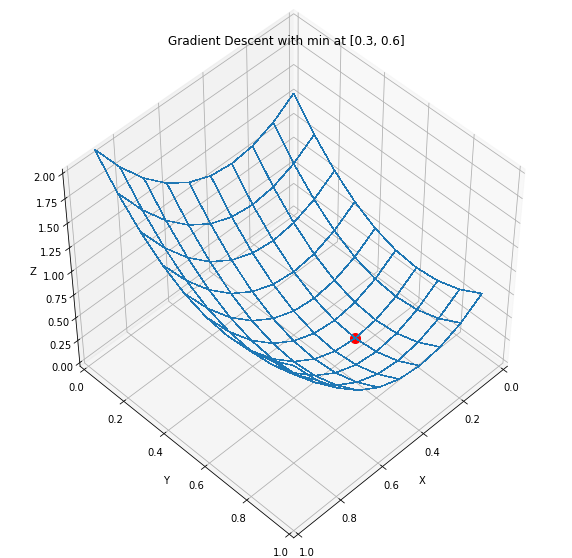

In [35]:
x_res = x_reses[-1]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0,1.0,0.1)
y = np.arange(0,1.0,0.1)
X,Y = np.meshgrid(x, y)
Z = f([X, Y])
ax.plot_wireframe(X, Y, Z, linewidth=.5, zorder=-1, antialiased=False)
ax.scatter(x_res[0], x_res[1], f([x_res[0], x_res[1]]), zdir='z', zorder=2.7, s=100, c='r', depthshade=True)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(azim=45, elev=50)
ax.set_title('Gradient Descent with min at [0.3, 0.6]')

plt.show() 

We can see that the error converges towards 0.

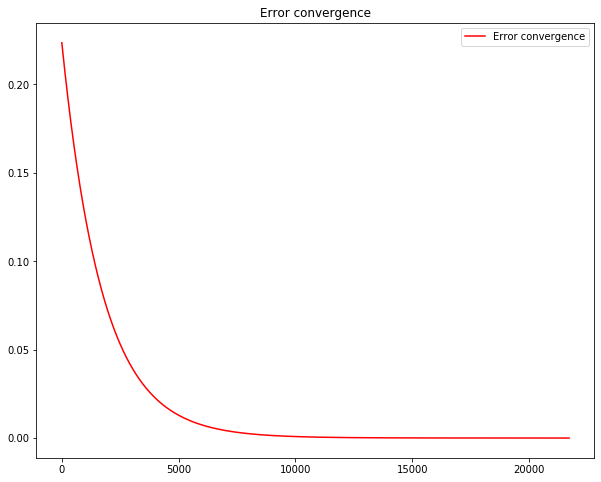

In [37]:
x_min = np.array([0.3,0.6])
N = len(x_reses)
error = np.zeros(N)
for i in range(N):
  error[i] = np.linalg.norm(x_reses[i] - x_min)

plt.figure(figsize=(10,8))
plt.title("Error convergence")
plt.plot(error, "-r", label="Error convergence")
plt.legend(loc="upper right")
plt.show()  

# **Discussion**

Minimization problems is something we have done before in calculus, so it was interesting to take another approach to it, one that is numerical instead. The function was not that hard to implement, the challenge was to overcome matplotlib and understand why the solution point did not appear in the plot. I also had some problems with the gradient function, since I first wanted to use numpy.gradient but it took input agruments on another form than I expected, so I wrote my own using central difference instead.